<a href="https://colab.research.google.com/github/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/blob/master/agrupamento_hier%C3%A1rquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#fazer um sistema de recomendacao com filmes pelo generos agrupando por agrupamento hierárquico

1.   pegar os dados
2.   conhecendo os dados
1.   mudar os nomes, columns = ['
2.   extrair os dados passando dados para coulunas binarias, get_dummies
1.   junto os dois dataframe, pd.concat([
2.   gerar um escala/nivel de genero sendo um filmes mais de comedia doque animaçao, StandardScaler
1.   algoritimo calcula a ditancia do grupo com uma arvore, matriz de distancia
2.   técnica chamada "top down" e "bottom up".



2.   Visualizar os grupos Diminuir as dimençoes com TNSE para visualias os grupos usando o SEABORN
1.   Visualizar os grupos por arvore - dendrograma


2.   Qual a quantidade de grupos que devo usar o método do cotovelo "elbow method"
1.   método é chamado de erro médio quadrado, ou mean squarred error (MSE).
2.   List item





o KMeans funciona, passa o numero de cluster, ele joga entao 3 pontos aleatorio chamado de centroids, calcula depois a distancia entre os 3 pontos, pega a metade do camilho e divide os dados dessa metade, recalcula a posição dos centroides os pontos para otimiza a a distancia dos dado realocando o centroides.

assim como redistribuir um hospital por regiao e bairro

- https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- https://filosophy.org/writing/visual-algorithms-k-means-clustering/







In [2]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes_df = pd.read_csv(uri)

filmes_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
filmes_df.columns = ['filme_id', 'titulo', 'generos']
filmes_df.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
type(filmes_df)

pandas.core.frame.DataFrame

In [5]:
type(filmes_df.generos)

pandas.core.series.Series

In [6]:
filmes_df.generos.str

In [7]:
filmes_df.generos

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: generos, Length: 9742, dtype: object

In [8]:
filmes_df.generos.str.get_dummies()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
generos_df = filmes_df.generos.str.get_dummies()
#axis eixo de concatenacao
dados_filmes_df = pd.concat([filmes_df, generos_df], axis=1)
dados_filmes_df.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#para escalar os dados usar a biblioteca de escalamento
from sklearn.preprocessing import StandardScaler

#treina o escalamneto
scaler = StandardScaler()
generos_escalados_ndarray = scaler.fit_transform(generos_df)

generos_escalados_ndarray

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [13]:
generos_escalados_ndarray.shape

(9742, 20)

In [14]:
#escalado Toy Story
print(generos_escalados_ndarray[53])
print(dados_filmes_df.loc[53])

[-0.05917995 -0.48060698  2.59101927 -0.25867916  3.69752441 -0.7921263
 -0.37463158 -0.21748944 -0.90024672  3.3920166  -0.09492563 -0.3340552
 -0.12839708 -0.18841895 -0.24998637 -0.44263346 -0.33443476 -0.49125897
 -0.20201972 -0.13206534]
filme_id                                              60
titulo                Indian in the Cupboard, The (1995)
generos                       Adventure|Children|Fantasy
(no genres listed)                                     0
Action                                                 0
Adventure                                              1
Animation                                              0
Children                                               1
Comedy                                                 0
Crime                                                  0
Documentary                                            0
Drama                                                  0
Fantasy                                                1
Film-Noir       

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados_ndarray)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [17]:
#grafico de dispersao
#TSNE reduzir as dimensoes
from sklearn.manifold import TSNE
tsne = TSNE()
visulizar = tsne.fit_transform(generos_escalados_ndarray)
visulizar

array([[-38.44389  , -24.2441   ],
       [-49.932175 ,  53.928078 ],
       [-39.050465 ,  -4.3738923],
       ...,
       [ 20.057276 ,  -5.707513 ],
       [-21.150179 ,  42.203556 ],
       [-15.262847 ,   5.499381 ]], dtype=float32)

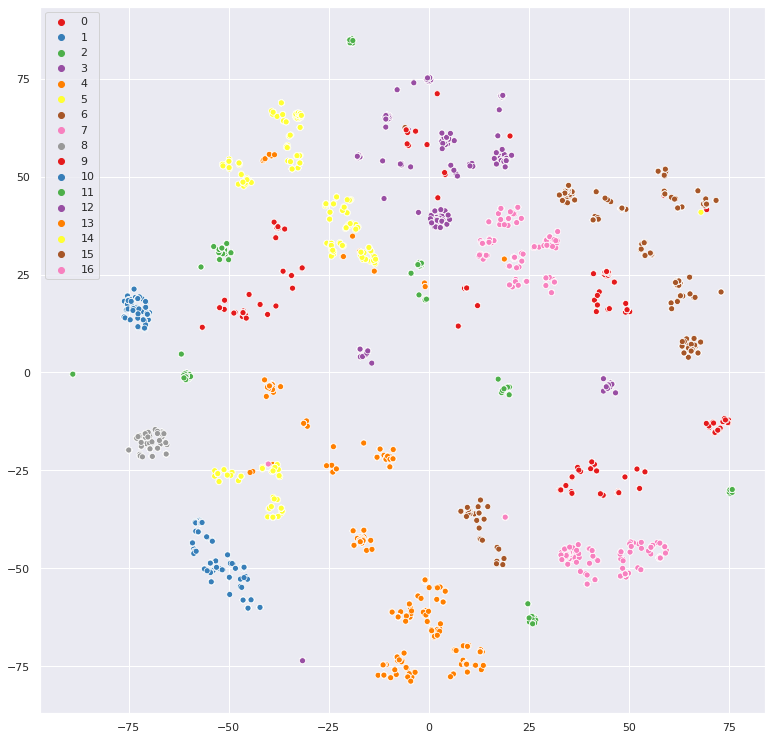

In [19]:
#SEABORN, !pip install seaborn para pegar nova versao 
import seaborn as sns
sns.set(rc={'figure.figsize':(13,13)})
sns.scatterplot(x=visulizar[:,0], 
                y=visulizar[:,1], 
                hue=grupos,
                palette=sns.color_palette('Set1', 17))

In [0]:
#dendrograma arvore, linkage matriz de distancia
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
#agrupar os filmes usando Cluesteriracao - KMeans
from sklearn.cluster import KMeans

#criar um modele, passando o numero de grupos n_clusters
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados_ndarray)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos_df.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.172788,0.853442,3.865793,1.535383,0.126132,-0.269026,-0.217489,-0.625266,0.698376,-0.094926,-0.259355,-0.128397,-0.188419,-0.171921,-0.282729,0.296552,-0.439691,-0.180991,-0.132065
1,-0.059180,-0.354072,-0.288693,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.045107,-0.200803,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.146352,-0.491259,-0.202020,-0.132065
2,-0.059180,-0.318359,-0.298068,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.306578,-0.172369,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.240382,-0.491259,-0.202020,-0.132065
3,-0.059180,0.402104,0.034527,-0.200424,-0.259242,-0.467113,-0.297244,-0.190284,0.747226,-0.242736,-0.094926,-0.305855,-0.128397,-0.188419,-0.213968,-0.053385,-0.231129,-0.198602,4.950012,-0.132065
4,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
5,-0.059180,1.629912,1.947994,-0.258679,-0.270451,-0.414089,-0.355150,-0.217489,-0.559172,0.660816,-0.094926,-0.264842,-0.128397,-0.188419,-0.222785,-0.299976,1.080496,-0.010148,-0.202020,-0.132065
6,-0.059180,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.078470,-0.132065
7,-0.059180,0.529898,-0.246774,-0.244570,-0.270451,-0.150225,2.669289,-0.217489,0.223375,-0.244363,-0.094926,-0.322672,-0.128397,-0.188419,-0.249986,-0.310160,-0.269991,0.661236,-0.202020,-0.132065
8,-0.059180,0.128485,0.249380,-0.183231,-0.125281,-0.303544,-0.189027,-0.188127,-0.189021,-0.159926,-0.094926,-0.192025,-0.128397,0.146687,-0.172239,-0.113141,-0.192533,-0.244737,0.112129,7.572010
9,-0.059180,-0.138011,-0.348025,-0.253425,-0.265396,-0.378599,-0.215650,-0.217489,-0.595386,-0.031801,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.366913,0.410943,0.606390,-0.202020,-0.132065


In [0]:
matriz_distancia = linkage(grupos)
matriz_distancia

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f9df60b70>,
      dtype=object)

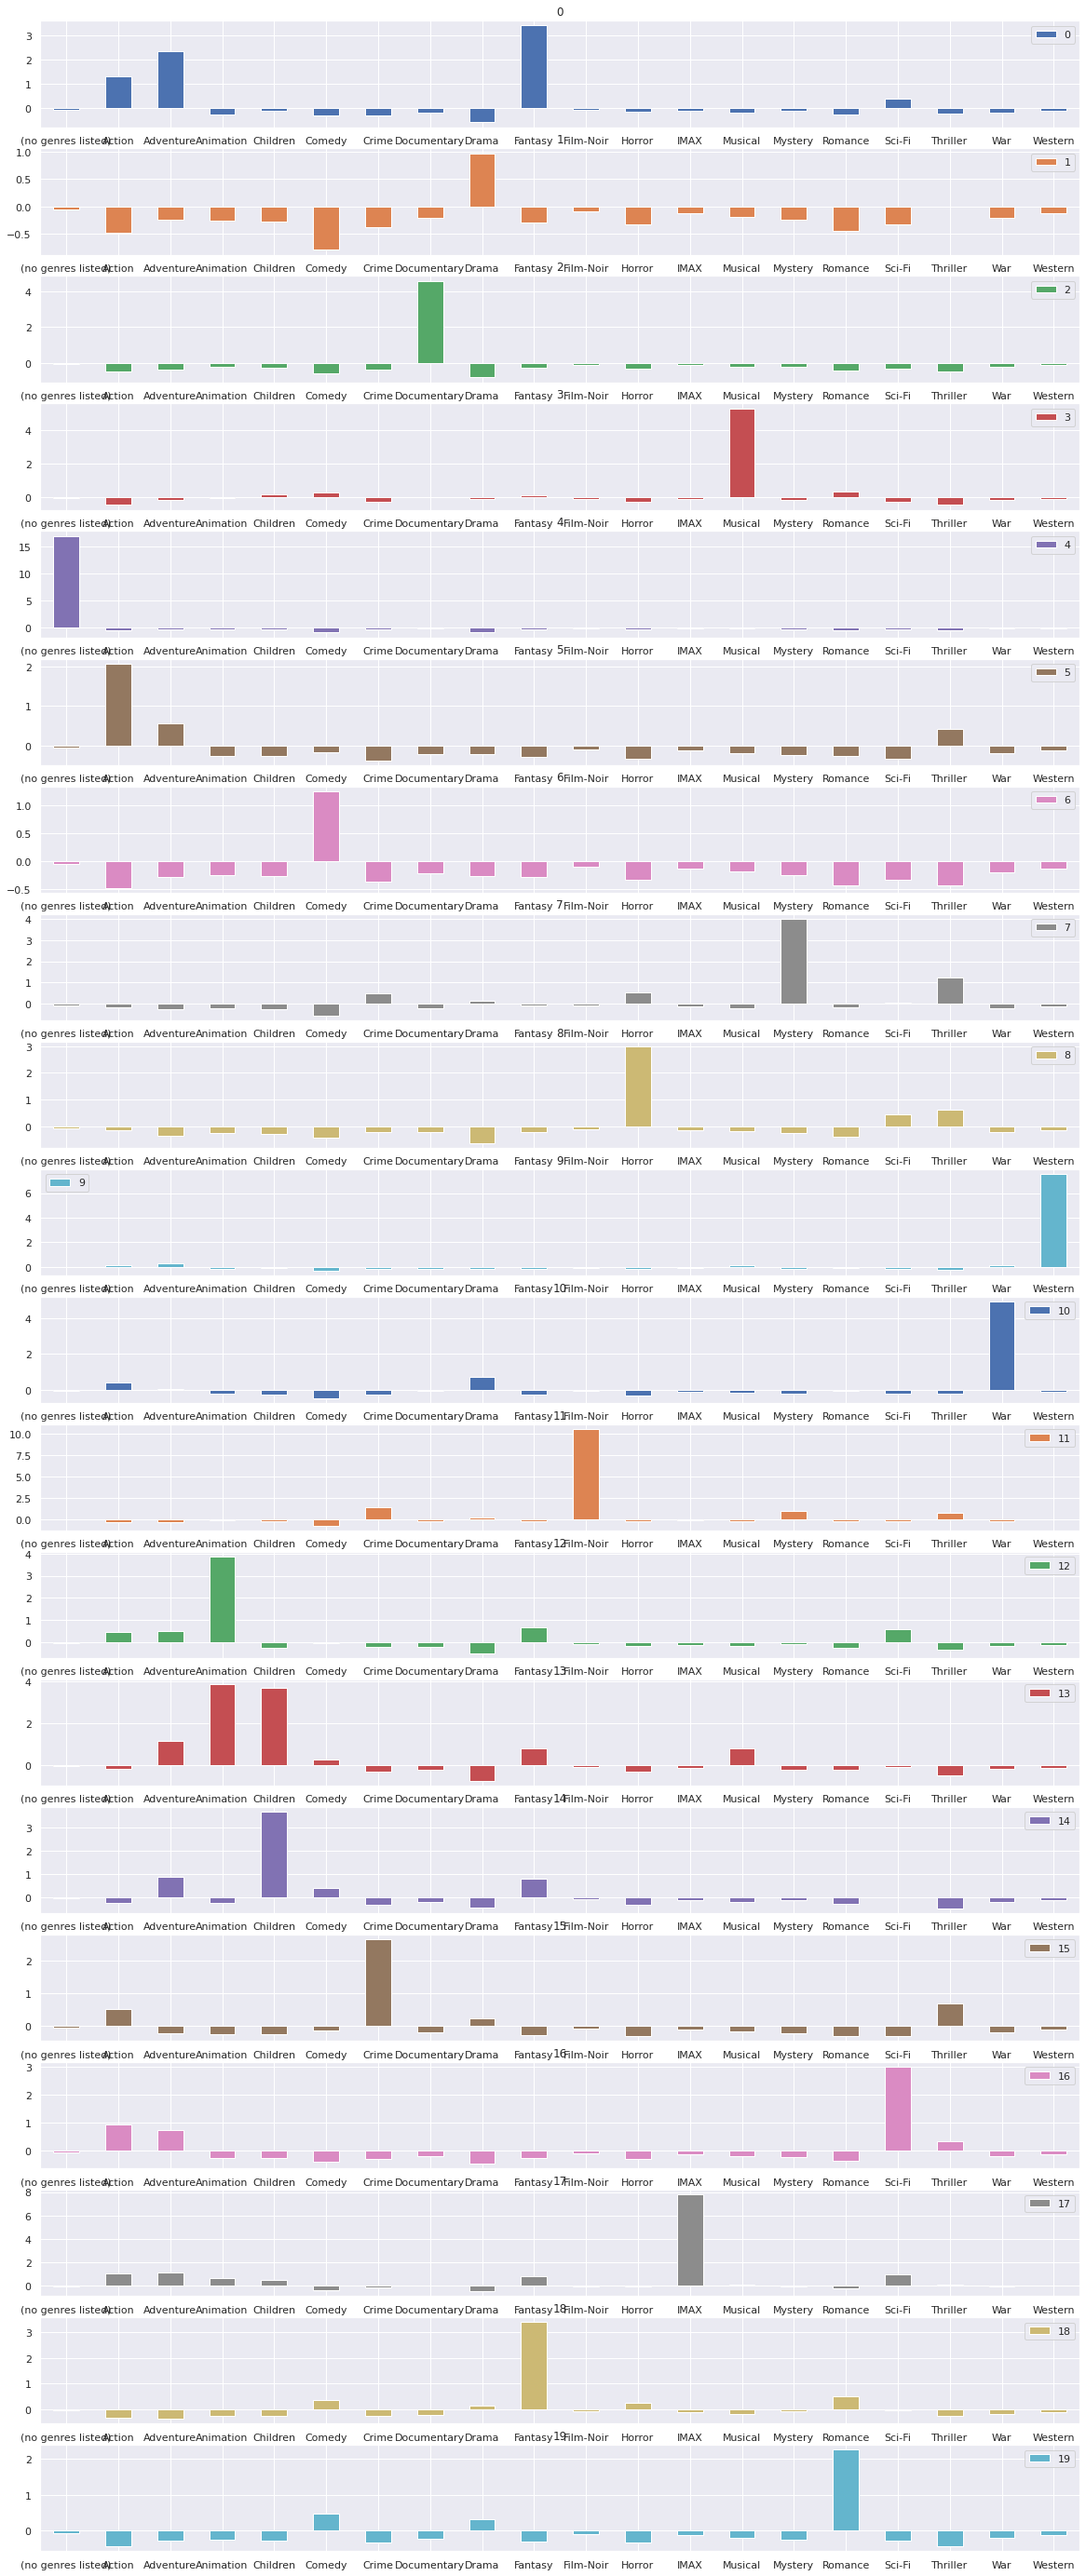

In [0]:
grupos.transpose().plot.bar(subplots=True, 
                            figsize=(20,50), 
                            sharex=False,
                            rot=0)

In [0]:
grupo = 2
filtro = modelo.labels_ == grupo
dados_filmes_df[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6485,53024,Jonestown: The Life and Death of Peoples Templ...,Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2247,2984,On Any Sunday (1971),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5894,33435,Los Angeles Plays Itself (2003),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5606,27002,From the Earth to the Moon (1998),Action|Documentary|Drama|Thriller,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
4041,5736,Faces of Death 3 (1985),Documentary|Horror,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
7584,86290,American: The Bill Hicks Story (2009),Comedy|Documentary,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7597,86593,African Cats (2011),Adventure|Documentary,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8081,99846,Everything or Nothing: The Untold Story of 007...,Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6700,58309,War Dance (2007),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6707,58425,Heima (2007),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#metrica para qual a quantidade de grupos, retorna inertia_ erro medio quadratico
def kmeans(numero_clusters, generos):
  modelo = KMeans(numero_clusters)
  modelo.fit(generos)
  return [numero_clusters, modelo.inertia_]

In [0]:
kmeans(20, generos_df)

[20, 6139.355757742675]

In [0]:
#método é chamado de erro médio quadrado, ou mean squarred error (MSE).
resultado = [kmeans(numeros, generos_df) for numeros in range(1,41)]
resultado

[[1, 16970.71812769452],
 [2, 14211.954295080885],
 [3, 12429.18144209558],
 [4, 11419.783914729396],
 [5, 10916.594764058536],
 [6, 9958.000530757457],
 [7, 9684.50604928364],
 [8, 9005.716649493308],
 [9, 8668.776995348791],
 [10, 8138.695270683788],
 [11, 7928.4968107707655],
 [12, 7504.434569152817],
 [13, 7258.135148750864],
 [14, 7242.35144872147],
 [15, 6983.132188595722],
 [16, 6777.816270680539],
 [17, 6565.442729405883],
 [18, 6478.089383972733],
 [19, 6172.0463515039],
 [20, 6249.845894089018],
 [21, 6011.357127153154],
 [22, 5908.729896168966],
 [23, 5855.830427616451],
 [24, 5667.272830326192],
 [25, 5555.5156465988175],
 [26, 5477.78500891896],
 [27, 5235.201216639085],
 [28, 5259.586809541112],
 [29, 5169.607783841455],
 [30, 5122.309790562898],
 [31, 5066.691357667122],
 [32, 4985.760019217686],
 [33, 4852.582153237062],
 [34, 4821.585275031156],
 [35, 4757.615434044524],
 [36, 4709.665022347871],
 [37, 4616.600126361152],
 [38, 4510.931970257693],
 [39, 4485.1644240884

In [0]:
#transformar em grafico
result = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
result.head()

,grupos,inertia
0,1,16970.718128
1,2,14211.954295
2,3,12429.181442
3,4,11419.783915
4,5,10916.594764


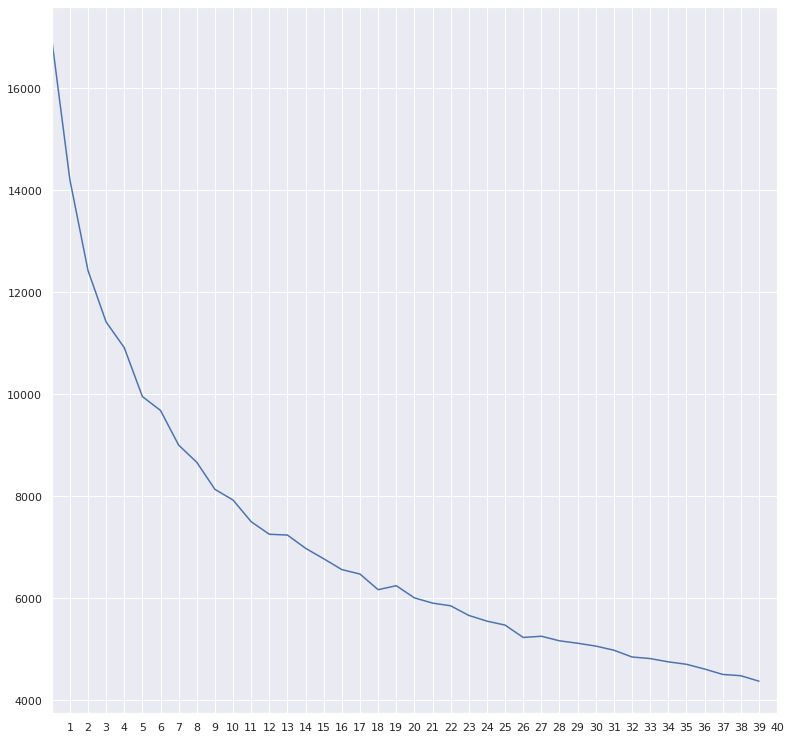

In [0]:
result.inertia.plot(xticks=result.grupos)

In [0]:
#técnica conhecida como "elbow method", ou "método do cotovelo" a curva do gráfico é decrescente de maneira regular, até que ela tem um momento de quebra e, então, continua caindo
kmeans(17, generos_df)

[17, 6500.461473158396]

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f9cacbe10>,
      dtype=object)

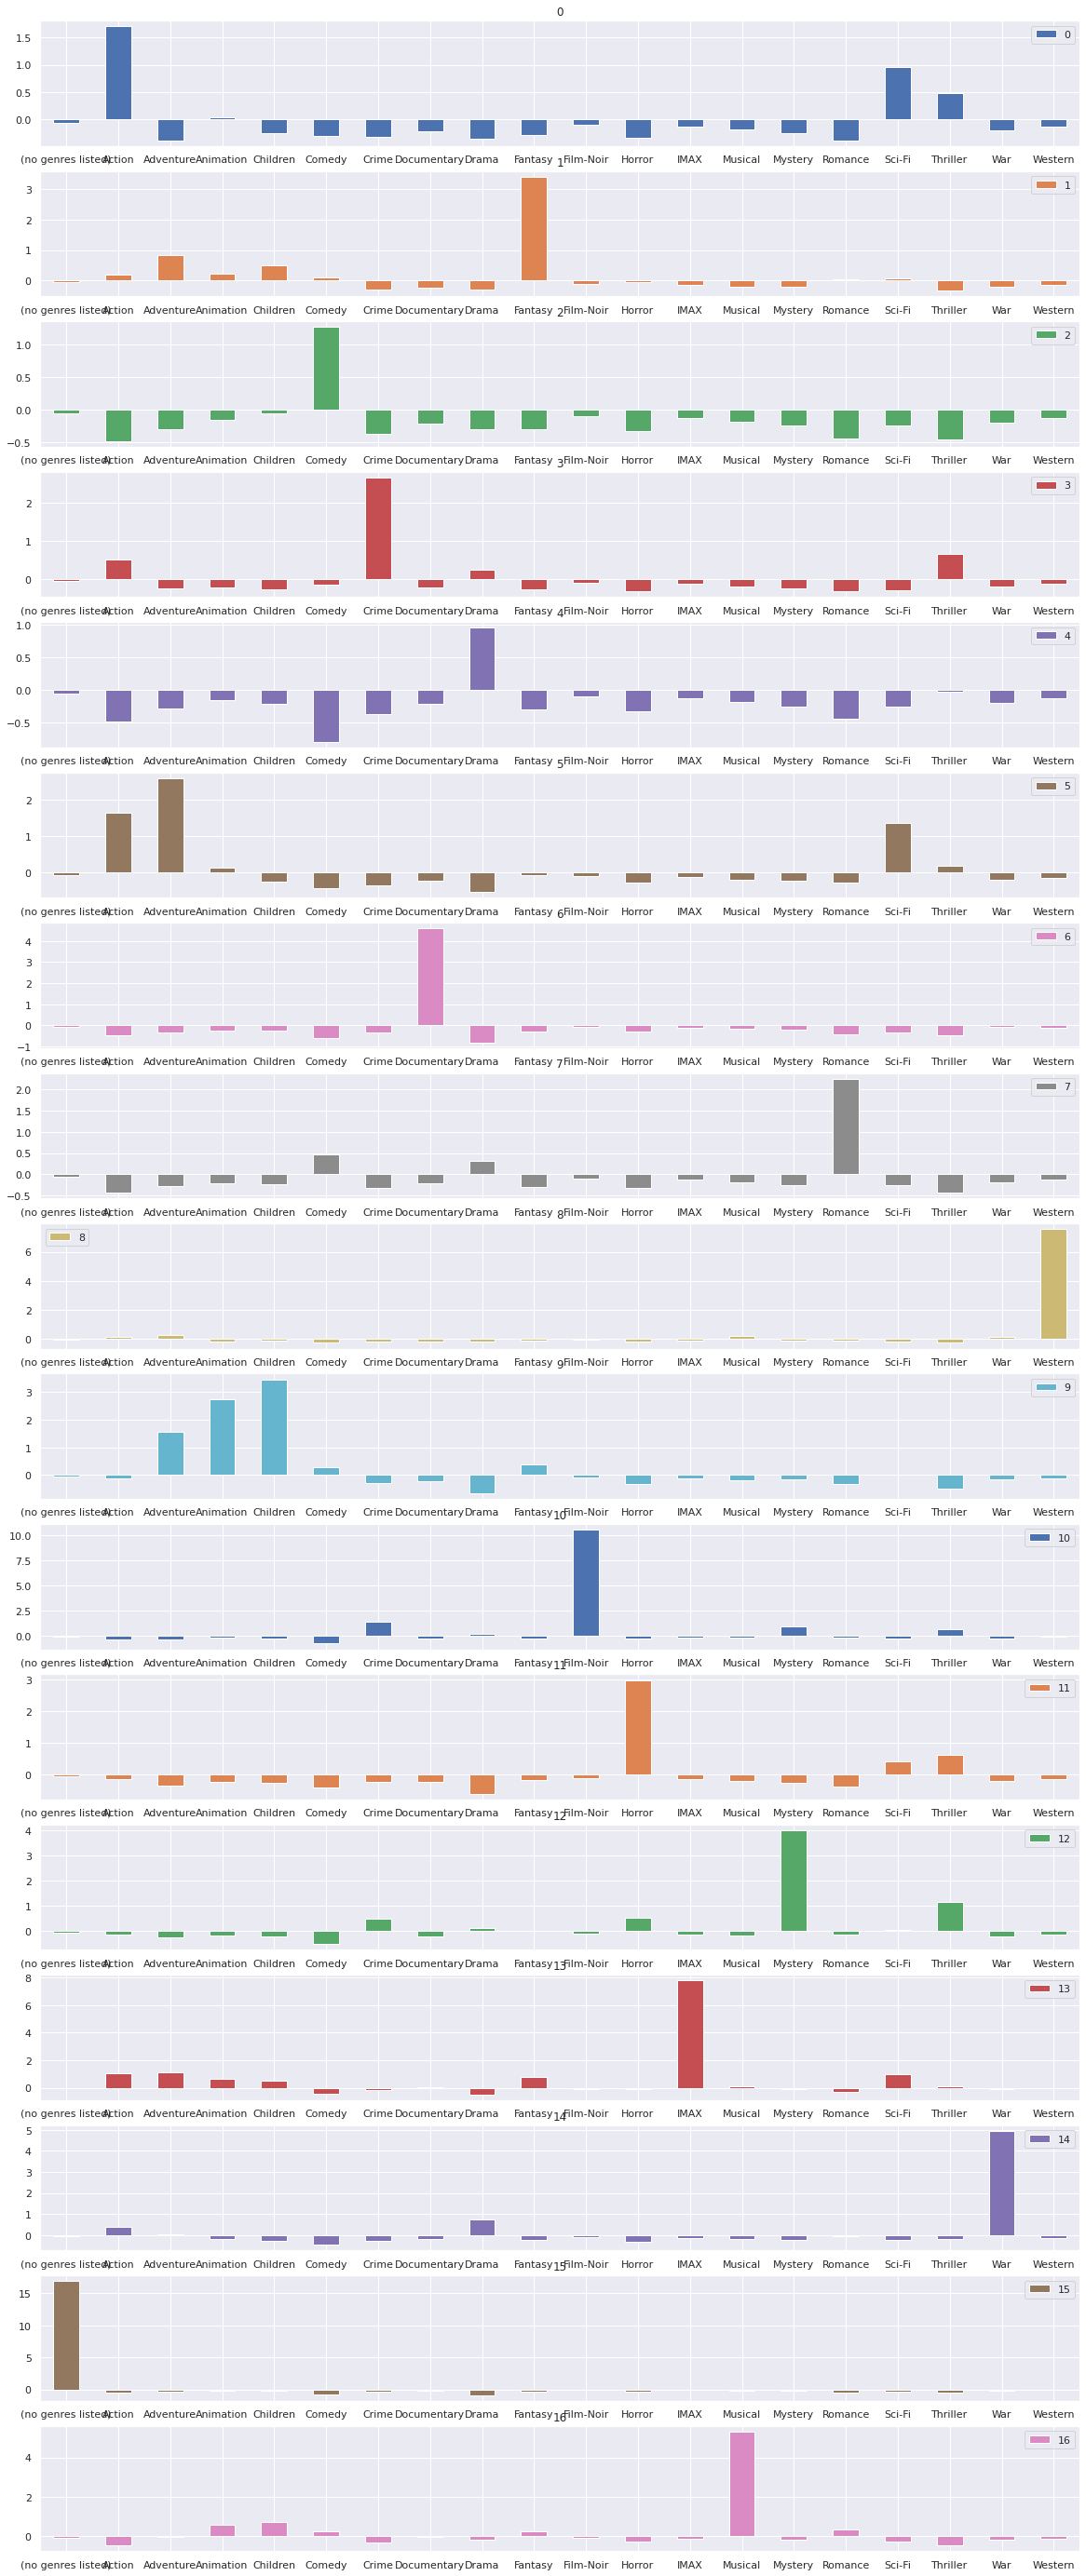

In [0]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados_ndarray)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos_df.columns)
grupos.transpose().plot.bar(subplots=True, 
                            figsize=(20,50), 
                            sharex=False,
                            rot=0)